# MI2 - ES03: Batch preprocessing and Online PCA
## The chantastic 4: Elisabeth Kress, Paola Suárez, Jianmeng Wu and Esra Zihni

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
%matplotlib inline

## 1. Preprocessing

### 1. a) Load data and compute PCA

In [2]:
# 2d data
filename = "pca2.csv"
data = np.loadtxt(filename, delimiter=',', skiprows=1)

# Zero-mean
data -= data.mean(axis=0)

In [3]:
# PCA
cov = np.cov(data.T)
l, w = LA.eig(cov)

# Projection into PCs
PCs = np.dot(w.T, data.T)

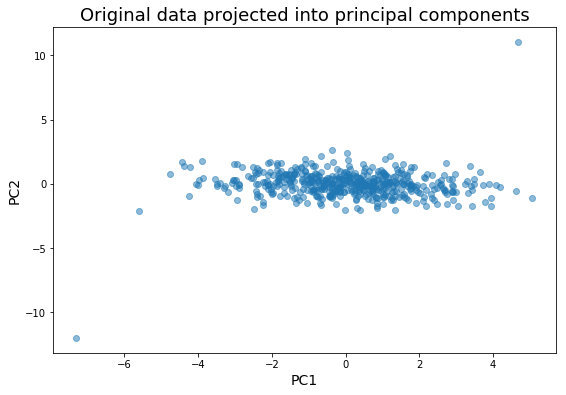

In [6]:
# Plot
plt.figure(figsize=(9,6))
plt.scatter(PCs[0,:], PCs[1,:], alpha = 0.5)
plt.title("Original data projected into principal components", size=18)
plt.xlim()
plt.ylim()
plt.xlabel("PC1", size=14)
plt.ylabel("PC2", size=14)
plt.show()

The reconstruction unveils two outliers, which are far-away from the main subgroup and diminish the variance within the main subgroup.

### 1. b) Remove outliers

In [8]:
# Remove 17 and 157, i.e. 16 and 156 in python indexing.
data_wo = np.delete(data, [16, 156], axis=0)

In [9]:
# New mean for data without 2 outliers
# Zero-mean
data_wo -= data_wo.mean(axis=0)

# PCA
cov_wo = np.cov(data_wo.T)
l_wo, w_wo = LA.eig(cov_wo)

# Projection onto PCs
PCs_wo = np.dot(w_wo.T, data_wo.T)

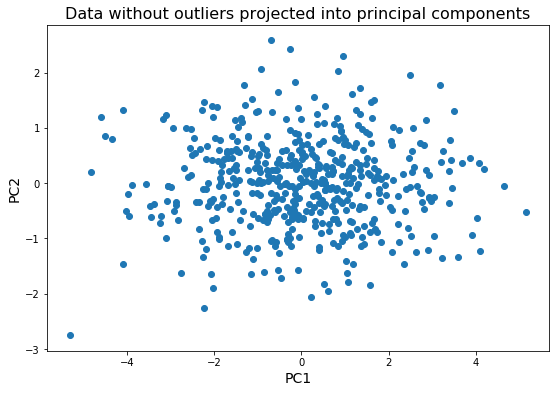

In [10]:
# Plot
plt.figure(figsize=(9,6))
plt.scatter(PCs_wo[0], PCs_wo[1])
plt.title("Data without outliers projected into principal components", size=16)
plt.xlabel("PC1", size=14)
plt.ylabel("PC2", size=14)
plt.show()

Now, the dataset is spanned homogeniously through the principal components.

## 2. Whitening

### 2. a) Load data set and check for outliers

In [12]:
# 4d data
filename = "pca4.csv"
data4 = np.loadtxt(filename, delimiter=',', skiprows=1)

# Zero mean
data4 -= np.mean(data4, axis=0)

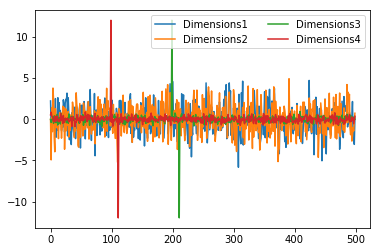

In [13]:
# Plot to check for outliers
plt.figure()
for c in range(data4.shape[-1]):
    plt.plot(data4[:,c], label="Dimensions%i" %(c+1))
plt.legend(ncol=2)
plt.show()

We have four outliers; to have reasonable data for PCA we will remove them.

In [14]:
# Finda max and min
data4_wo = data4.copy()
max_idx = np.unravel_index(np.argmax(data4_wo), data4_wo.shape)
min_idx = np.unravel_index(np.argmin(data4_wo), data4_wo.shape)

In [52]:
# Mask the outliers with zero (np.nan doesn't work and we can't remove because the dimensions of the array will change)
# Further suggestions?
while data4_wo[min_idx] < -10 or data4_wo[max_idx] > 10:
    data4_wo[max_idx] = 0
    data4_wo[min_idx] = 0
    max_idx = np.unravel_index(np.argmax(data4_wo), data4_wo.shape)
    min_idx = np.unravel_index(np.argmin(data4_wo), data4_wo.shape)

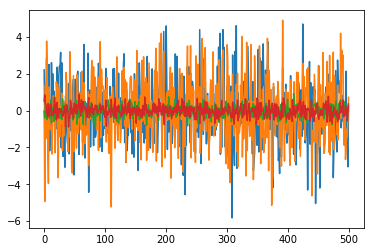

In [61]:
# Plot again to see the result
plt.figure()
plt.plot(data4_wo)
plt.show()

### 2. b) PCA algorithm

In [65]:
# PCA
cov_wo = np.cov(data4_wo.T)
l_wo, w_wo = LA.eig(cov_wo)

# Projection onto PCs
PCs_wo = np.dot(w_wo.T, data4_wo.T)

# Normalize eigenvalues
l_wo = np.real(l_wo)/LA.norm(l_wo)

In [90]:
np.linspace(1,4,4)

array([ 1.,  2.,  3.,  4.])

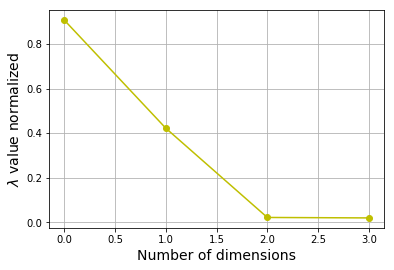

In [97]:
# Scree plot
plt.figure()
plt.plot(l_wo, 'yo-')
plt.xlabel("Number of dimensions", size=14)
plt.ylabel(r"$\lambda$ value normalized", size=14)
plt.grid()
plt.show()

Three PCs are necessary to represent the data well.

### 2. c) Whiten the data

### 2. d) Heat plots

## 4. 3. Oja's Rule: Application

In [18]:
data_oja = np.loadtxt('data-onlinePCA.txt', delimiter=',', skiprows=1, usecols=(1,2))

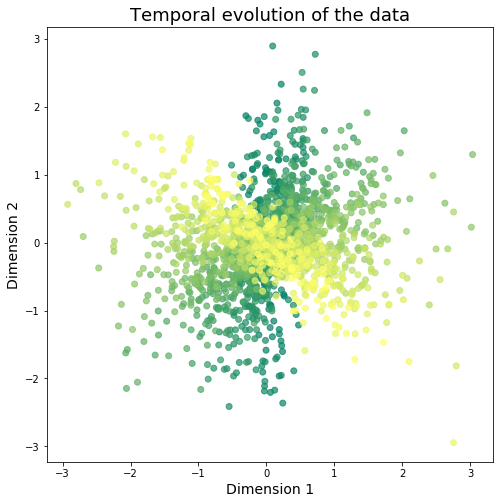

In [30]:
plt.figure(figsize=(8, 8))
plt.scatter(data_oja[:,0],data_oja[:,1],c=range(2000),cmap='summer',alpha=0.7)
plt.axis('equal')
plt.title("Temporal evolution of the data", fontsize=18)
plt.xlabel("Dimension 1", size=14)
plt.ylabel("Dimension 2", size=14)
plt.show()

## 3.4.1. Oja's Rule Scatter Plot Temporal Evolution

In [44]:
batched_data = np.zeros((10,200,2))
for i, j in enumerate(np.arange(0,2000,200)):
       batched_data[i,:,:] = data_oja[j:j+200,:]

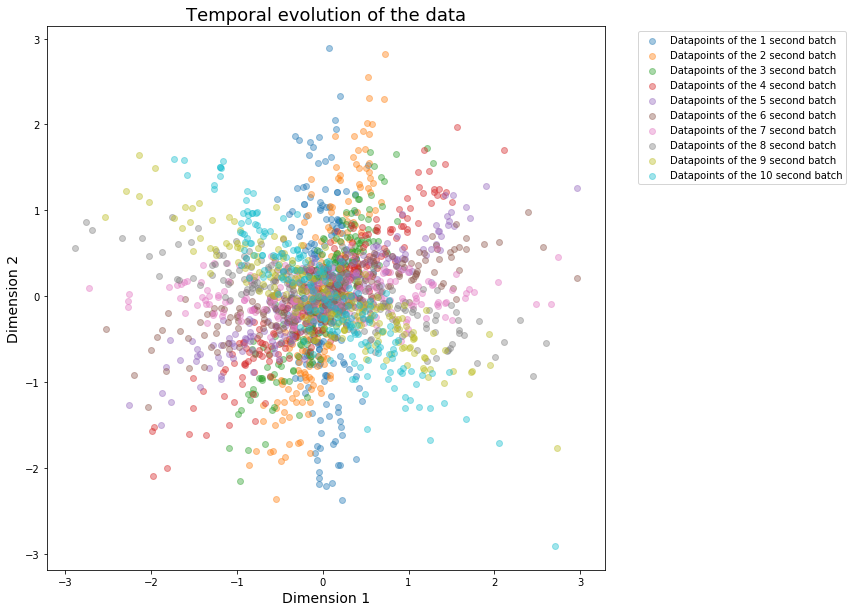

In [88]:
plt.figure(figsize=(10, 10))
for l in range(10):
    plt.scatter(batched_data[l,:,0],batched_data[l,:,1],alpha=0.4, label = 'Datapoints of the %i second batch' %(l+1))
plt.axis('equal')
plt.title("Temporal evolution of the data", fontsize=18)
plt.xlabel("Dimension 1", size=14)
plt.ylabel("Dimension 2", size=14)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## 3.4.2 Determining the PCA's

In [77]:
l_bd = np.zeros((10,2))
cov_bd = np.zeros((10,2,2))
w_bd = np.zeros((10,2,2))
pc1 = np.zeros((10,2))
for k in range(10):
    batched_data[k] -= np.mean(batched_data[k], axis=0)
    # PCA
    cov_bd[k] = np.cov(batched_data[k].T)
    l_bd[k], w_bd[k] = LA.eig(cov_bd[k])
    pc1[k]=w_bd[k,:,np.argmax(l_bd[k])]

C:\Users\Molly\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: ComplexWarning: Casting complex values to real discards the imaginary part


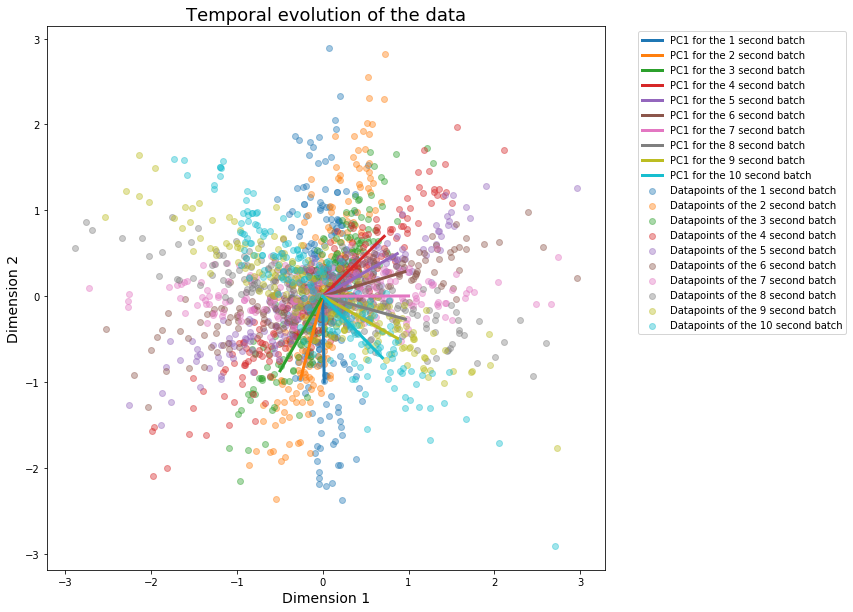

In [86]:
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.title("Temporal evolution of the data", fontsize=18)
plt.xlabel("Dimension 1", size=14)
plt.ylabel("Dimension 2", size=14)
for l in range(10):
    plt.plot((0, pc1[l,0]),(0,pc1[l,1]),  linewidth=3.0, label = 'PC1 for the %i second batch' %(l+1))
    plt.scatter(batched_data[l,:,0],batched_data[l,:,1],alpha=0.4, label = 'Datapoints of the %i second batch' %(l+1))
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## 3.4.3 Implement Oja's Rule

In [110]:
eps = [0.002, 0.04, 0.45]
def oja(eps):
    y = np.zeros((2000,1))
    weights = np.zeros((2001,2))
    weights[0] = np.random.rand(2)
    for i in range(data_oja.shape[0]):
        y[i] = np.dot(weights[i].T, data_oja[i])
        weights[i+1] = (weights[i] + eps*y[i]*data_oja[i])/LA.norm(weights[i] + eps*y[i]*data_oja[i])
    return weights

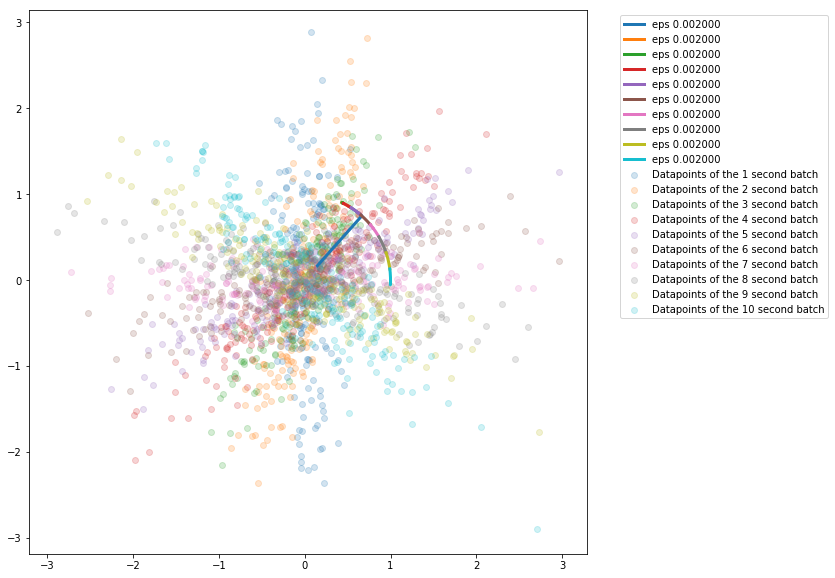

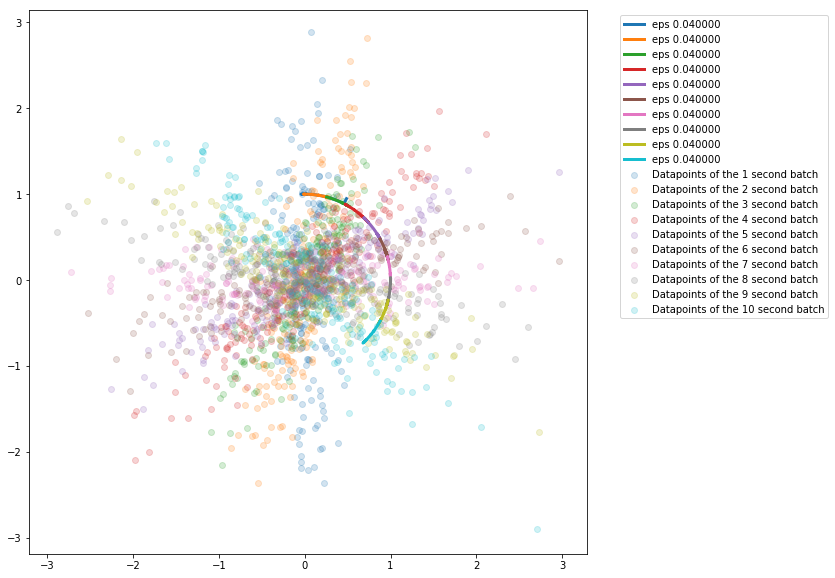

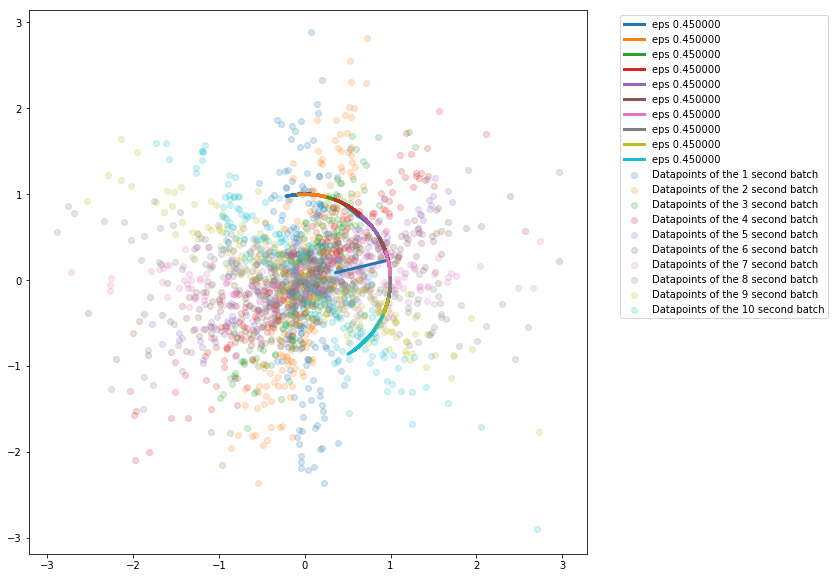

In [140]:
for i in eps:
    plt.figure(figsize = (10,10))
    plt.axis('equal')
    weights = oja(i)
    batched_weights = np.zeros((10,200,2))
    for k, j in enumerate(np.arange(0,2000,200)):
        batched_weights[k,:,:] = weights[j:j+200,:]
    for l in range(10):
        plt.scatter(batched_data[l,:,0],batched_data[l,:,1],alpha=0.2, label = 'Datapoints of the %i second batch' %(l+1))
        plt.plot(batched_weights[l,:,0],batched_weights[l,:,1], linewidth = 3.0,  label = 'eps %f' %i)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()